# 석차를 이용한 모집단 추정

  먼저 필자는 통계학에 관한 전문가가 아니므로 앞으로의 추론에 논리적 오류가 있거나 현대 통계학에서 사용되는 용어와 이 글의 용어가 다를 수 있습니다. 양해 부탁드립니다.


## 주어진 데이터

![title](Images/seongjeokpyo.jpg)

 ![title](Images/seongjeokpyo2.jpg)
 
 
 ### 요약
 
 1447.7점 : 7/380
 
  811.1점 : 240/380
  
  
  
  
  ## 추론
  
  먼저 모집단을 풍파고 학생과 동일한 수준 분포의 무한한 학생들이 동일한 시험을 쳤을때 받을 성적으로 정의하자. 이때 성적의 분포를 정규분포로 가정하고 받을 수 있는 점수의 범위도 실수 전체라고 가정해보자.
  주어진 데이터는 단 2명의 데이터로 전교생(n=380)에 비하면 매우 작은 수이다. 그러나 위 데이터에는 석차라는 데이터가 있으므로 신뢰도 100%의 유의미한 학생 전체 평균 점수의 존재 구간을 알 수 있다. 먼저 학생들을 3개의 집단 A, B, C로 나누어 보자. A는 1447.7점 초과의 학생들로 n(A)=6, B는 1447.7점 이하이고 811.1점 초과의 학생들로 n(B)=232, C는 811.1점 이하의 학생들로 n(C)=140이다. 
  이때 각 group의 평균을 m(group)이라고 할때 전체 학생의 평균 점수 M은
  ### M = (6/380)* m(A) +  (1/380)* 1447.7 + (232/380)* m(B) + (1/380)* 811.1 + (140/380)* m(C)
  
  이다. 이때 각 group 평균의 범위는 group 원소 범위와 같으므로 M은 1212.3136842105 이하 524.0005263158 초과 이다.

In [79]:
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import beta
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import axes3d

In [77]:
#모수가 정규분포일때 평균과 분산을 구해보자
rv = sp.stats.norm(loc=0, scale=1)

print(rv.ppf(373/380)) #7등 분위수값
print(rv.ppf(20/380))
print(rv.ppf(353/360))
print(rv.ppf(120/360)) 

# 평균 +  분산*2.0875094772894123= 1446.7
# 평균 +  분산*-1.6198562586382699= 450
A = np.array([[1,2.0875094772894123],[1,-1.6198562586382699]])
B = np.array([1446.7, 450])
C = np.linalg.solve(A, B)
print(C) 

2.0875094772894123
-1.6198562586382699
2.0653606500222765
-0.43072729929545756
[885.48731039 268.84318165]


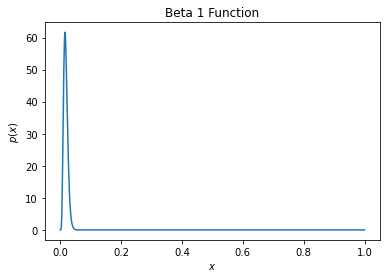

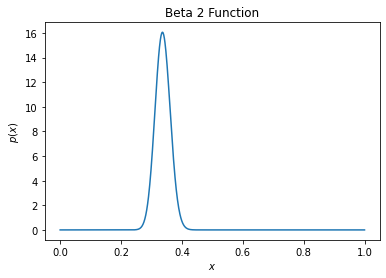

In [67]:
# 모집단에서 점수가 1447.7을 초과할 화률의 분포
beta1=  sp.stats.beta(a=7, b=375,)
xx = np.linspace(0, 1, 1000)
pdf = beta1.pdf(xx)
plt.plot(xx, pdf)
plt.title("Beta 1 Function")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

# 모집단에서 점수가 811.1이하일 화률의 분포
beta2=  sp.stats.beta(a=122, b=240,)
pdf = beta2.pdf(xx)
plt.plot(xx, pdf)
plt.title("Beta 2 Function")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

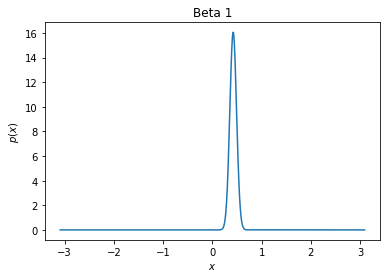

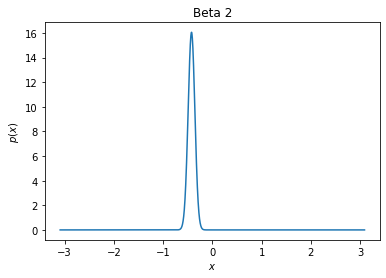

In [68]:
rv = sp.stats.norm(loc=0, scale=1)
X1=rv.ppf(1-xx)
X2=rv.ppf(xx)

# 모집단에서 1447.7점의 분위수 확률분포
beta1=  sp.stats.beta(a=7, b=375,)
beta1_pdf = beta1.pdf(xx)
plt.plot(X1, pdf)
plt.title("Beta 1")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

# 모집단에서 811.1점의 분위수 확률분포
beta1=  sp.stats.beta(a=7, b=375,)
beta2_pdf = beta2.pdf(xx)
plt.plot(X2, pdf)
plt.title("Beta 2")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [69]:
type(beta1_pdf), beta1_pdf.shape

(numpy.ndarray, (1000,))

In [ ]:
x_mat = np.array([xx])
#yy=xx[:,np.newaxis]
y_mat=x_mat.T
xy_mat=y_mat@x_mat

In [84]:
xv, yv = np.meshgrid(xx, xx, sparse=True)


In [92]:
# 평균 +  분산*1447.7점의 분위수= 1446.7
# 평균 +  분산*811.1점의 분위수= 811.1
def solver(x,y):
    A = np.array([[1,x],[1,y]])
    B = np.array([1446.7, 450])
    try:
        C = np.linalg.solve(A, B)
    except Exception:
        return np.array([0,0])
    return C
solver = np.vectorize(solver, signature='(),()->(k)', otypes=[np.ndarray])


np.set_printoptions(threshold=sys.maxsize)
C=solver(xv,yv)
C=np.nan_to_num(C, nan=0, posinf=0, neginf=0)
C.shape

(1000, 1000, 2)

In [ ]:
print(np.isnan(C))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

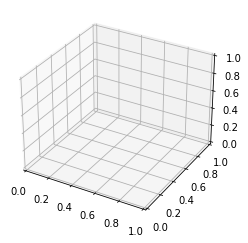

In [94]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = xx
X = np.tile(x, (11, 1))
Y = np.transpose(X)
#Z = np.random.rand(11, 11)

surf = ax.plot_surface(X, Y, C[:,:,0], cmap='viridis')
ax.plot_surface(xv, yv,  C[:,:,0], cmap='viridis')
fig.colorbar(surf, shrink=0.6, aspect=8)
ax.set_zlim(0, 2)

plt.tight_layout()
plt.show()